In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = x_train.reshape(x_train.shape[0], -1).T / 255.0
Y_train = y_train
X_test = x_test.reshape(x_test.shape[0], -1).T / 255.0
Y_test = y_test

In [ ]:
X_dev = X_train[:, :1000]
Y_dev = Y_train[:1000]

X_train = X_train[:, 1000:]
Y_train = Y_train[1000:]
print(X_dev.shape)
X_train.shape

(784, 1000)


(784, 59000)

In [ ]:
def init_params(input_size, hidden_size, output_size):
    # np.random.randn(rows, columns)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2


In [ ]:
def ReLU(Z):
    return np.maximum(0, Z)


In [ ]:
def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

In [ ]:
def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def back_prop(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    one_hot_Y = np.eye(10)[Y].T
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (Z1>0)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

In [ ]:
a = np.eye(10)[Y_train]
print(Y_train[:10])
for i in range(10):
    print(f"For {i} : {a[i]}")


[0 7 1 1 4 9 4 3 4 8]
For 0 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
For 1 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
For 2 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
For 3 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
For 4 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
For 5 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
For 6 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
For 7 : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
For 8 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
For 9 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# updating paramaters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

In [ ]:
def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

In [ ]:
def gradient_descent(X, Y, alpha, iterations, hidden_size):
    input_size = X.shape[0]
    output_size = 10
    W1, b1, W2, b2 = init_params(input_size, hidden_size, output_size)

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i%10 ==0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iterations {i}: Accuracy = {accuracy:.3f}")

    return W1, b1, W2, b2



In [ ]:
# Training the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500, hidden_size=64)

Iterations 0: Accuracy = 0.093
Iterations 10: Accuracy = 0.358
Iterations 20: Accuracy = 0.470
Iterations 30: Accuracy = 0.496
Iterations 40: Accuracy = 0.482
Iterations 50: Accuracy = 0.492
Iterations 60: Accuracy = 0.560
Iterations 70: Accuracy = 0.636
Iterations 80: Accuracy = 0.686
Iterations 90: Accuracy = 0.719
Iterations 100: Accuracy = 0.751
Iterations 110: Accuracy = 0.777
Iterations 120: Accuracy = 0.797
Iterations 130: Accuracy = 0.811
Iterations 140: Accuracy = 0.821
Iterations 150: Accuracy = 0.831
Iterations 160: Accuracy = 0.839
Iterations 170: Accuracy = 0.846
Iterations 180: Accuracy = 0.852
Iterations 190: Accuracy = 0.858
Iterations 200: Accuracy = 0.862
Iterations 210: Accuracy = 0.866
Iterations 220: Accuracy = 0.868
Iterations 230: Accuracy = 0.871
Iterations 240: Accuracy = 0.874
Iterations 250: Accuracy = 0.876
Iterations 260: Accuracy = 0.878
Iterations 270: Accuracy = 0.880
Iterations 280: Accuracy = 0.882
Iterations 290: Accuracy = 0.884
Iterations 300: Accur

In [ ]:
# Testing Predections
def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = get_predictions(forward_prop(current_image, W1, b1, W2, b2)[-1])
    label = Y[index]
    print(f"Prediction: {prediction[0]}, Label: {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

Prediction: 0, Label: 0


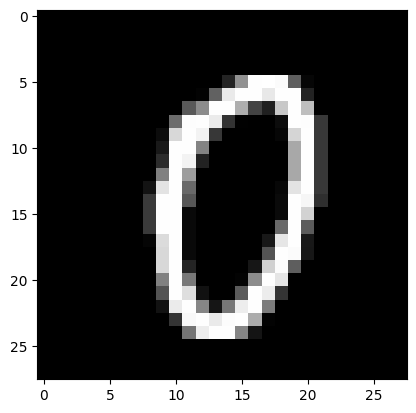

Prediction: 7, Label: 7


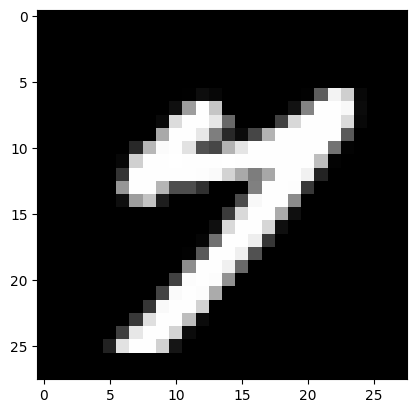

Prediction: 1, Label: 1


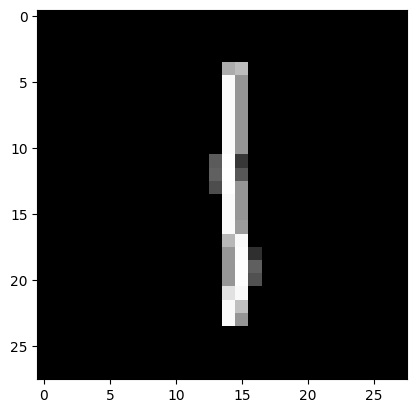

Prediction: 1, Label: 1


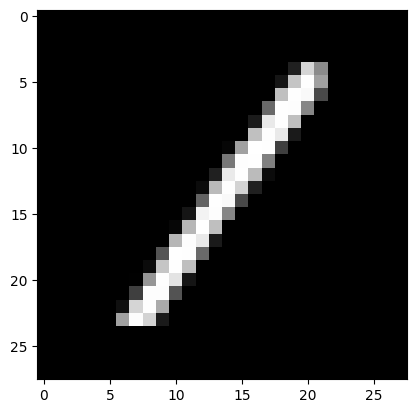

Prediction: 4, Label: 4


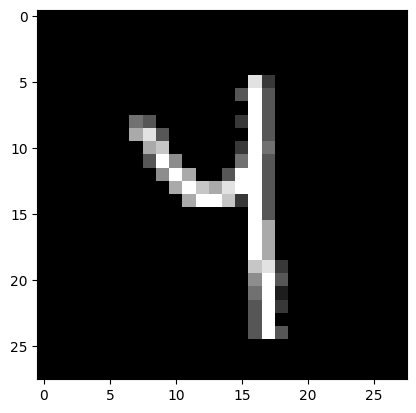

Prediction: 9, Label: 9


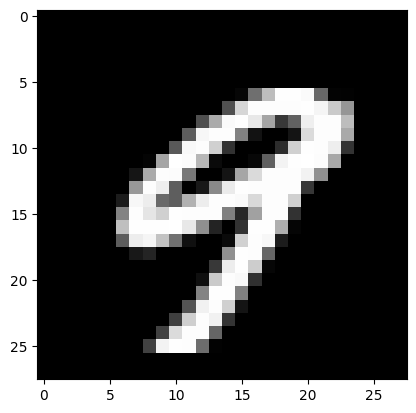

Prediction: 4, Label: 4


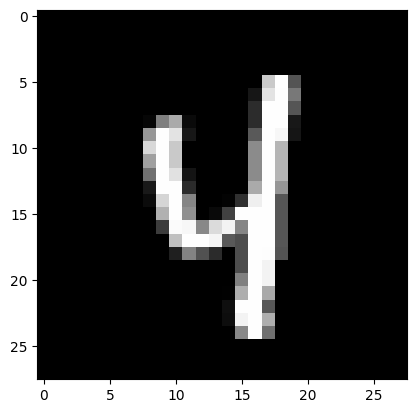

Prediction: 9, Label: 3


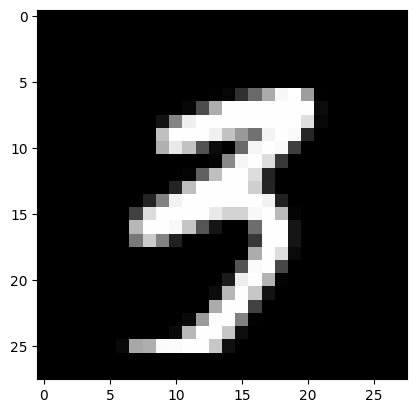

In [ ]:

for i in range(random.randrange(1, 10)):
    test_prediction(i, X_train, Y_train, W1, b1, W2, b2)

In [ ]:
# Evaluating th test
test_predictions = get_predictions(forward_prop(X_test, W1, b1, W2, b2)[-1])
print(f"Test set accuracy: {get_accuracy(test_predictions, Y_test):.3f}")
print(f"In Percentage: {get_accuracy(test_predictions, Y_test)*100}")

Test set accuracy: 0.906
In Percentage: 90.62
